In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from google.colab import files
uploaded = files.upload()

Saving kyphosis.csv to kyphosis.csv


In [0]:
df = pd.read_csv('kyphosis.csv')

In [0]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


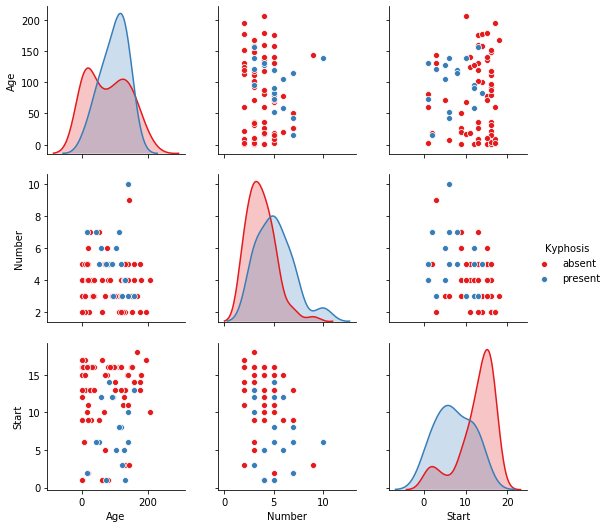

In [0]:
sns.pairplot(df, hue='Kyphosis' ,palette='Set1')

In [0]:
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
prediction = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test,prediction))

[[20  2]
 [ 2  1]]


              precision    recall  f1-score   support

      absent       0.91      0.91      0.91        22
     present       0.33      0.33      0.33         3

    accuracy                           0.84        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.84      0.84      0.84        25



In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred= rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[20  2]
 [ 2  1]]


              precision    recall  f1-score   support

      absent       0.91      0.91      0.91        22
     present       0.33      0.33      0.33         3

    accuracy                           0.84        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.84      0.84      0.84        25

